In [1]:
import numpy as np
import struct
from sklearn import neighbors, metrics
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

In [2]:
def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.fromstring(f.read(), dtype=np.uint8).reshape(shape)

In [3]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    accuracy = np.mean(np.max(cm,axis=1))
    print('accuracy is : ',accuracy)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return accuracy

In [4]:
root = './data'
download = True

trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (1.0,))])
train_set = dset.MNIST(root=root, train=True, transform=trans, download=download)
test_set = dset.MNIST(root=root, train=False, transform=trans)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.2MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 500kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.49MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.31MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [7]:
raw_train = read_idx("/content/data/MNIST/raw/train-images-idx3-ubyte")
train_data = np.reshape(raw_train,(60000,28*28))
train_label = read_idx("/content/data/MNIST/raw/train-labels-idx1-ubyte")

raw_test = read_idx("/content/data/MNIST/raw/t10k-images-idx3-ubyte")
test_data = np.reshape(raw_test,(10000,28*28))
test_label = read_idx("/content/data/MNIST/raw/t10k-labels-idx1-ubyte")


<ipython-input-2-6a24037f0b58>:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  return np.fromstring(f.read(), dtype=np.uint8).reshape(shape)


In [8]:
X = train_data[:10000]
Y = train_label[:10000]
x_test = test_data[:2000]
y_true = test_label[:2000]
k_num=[1,2,3,4,5,6,7,8,9]
acc=[]

Normalized confusion matrix
accuracy is :  0.9092083469058636
Normalized confusion matrix
accuracy is :  0.8919195480261453
Normalized confusion matrix
accuracy is :  0.9125586025180933
Normalized confusion matrix
accuracy is :  0.9076983210297003
Normalized confusion matrix
accuracy is :  0.9106082600044992
Normalized confusion matrix
accuracy is :  0.9100577574877897
Normalized confusion matrix
accuracy is :  0.9051527964422339
Normalized confusion matrix
accuracy is :  0.9038174722401322
Normalized confusion matrix
accuracy is :  0.89599075880115


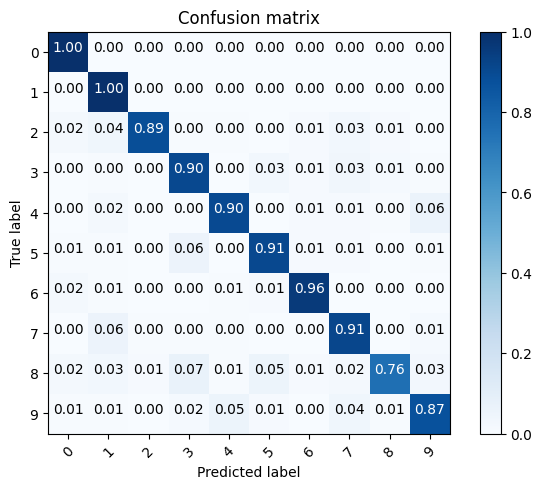

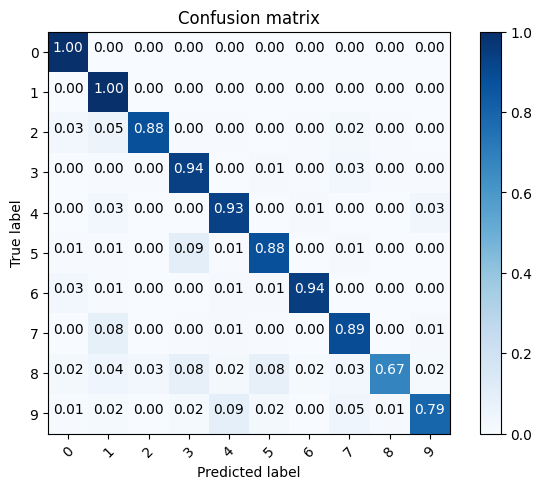

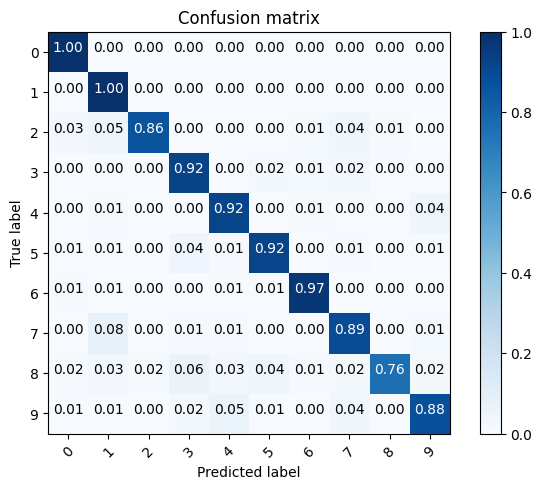

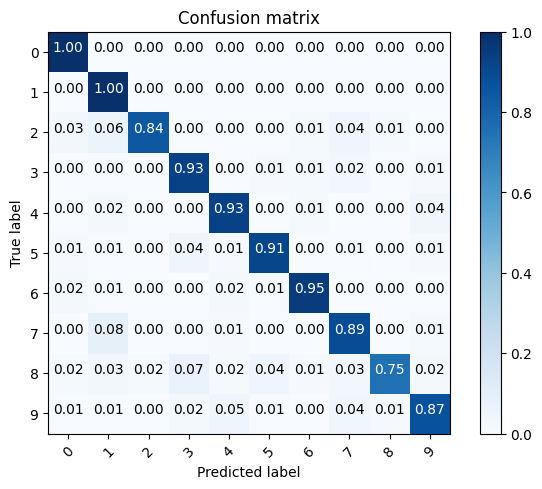

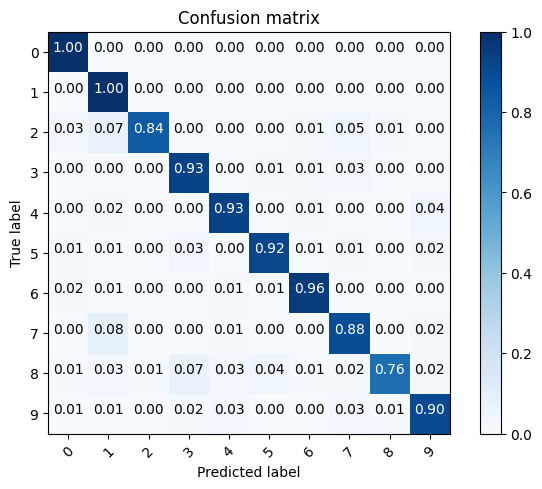

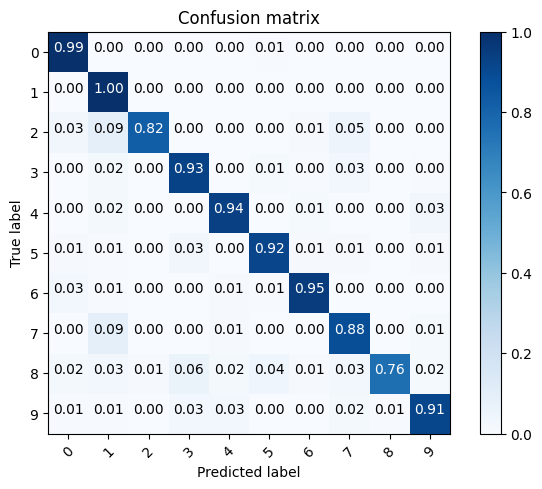

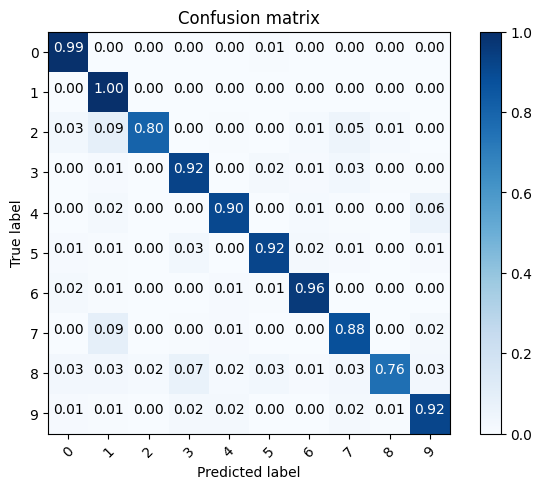

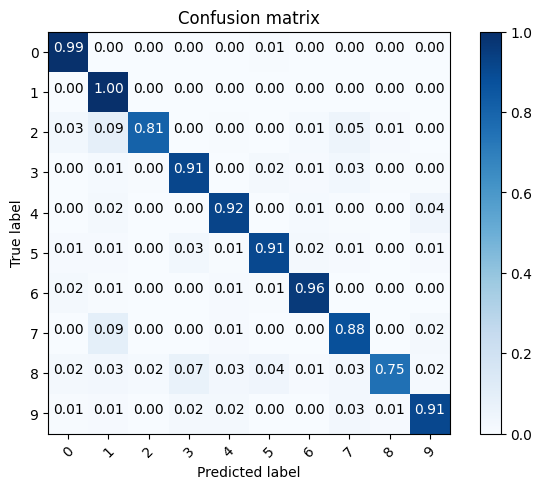

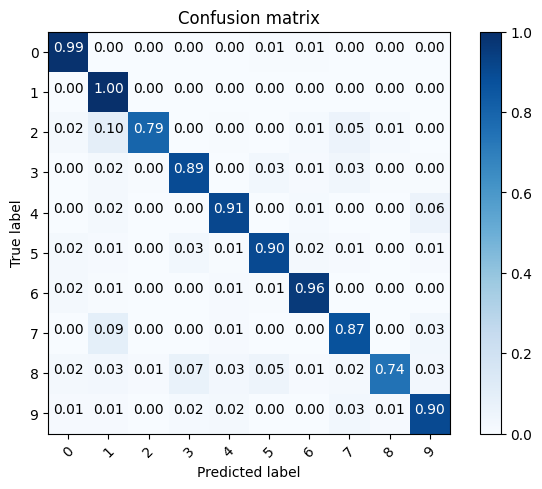

<Figure size 640x480 with 0 Axes>

In [9]:
for k in k_num:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k,p=1).fit(X,Y)
    y_pred = knn.predict(x_test)
    cm = metrics.confusion_matrix(y_true, y_pred)
    accuracy=plot_confusion_matrix(cm, ['0','1','2','3','4','5','6','7','8','9'],normalize=True)
    acc.append(accuracy)
    plt.figure()

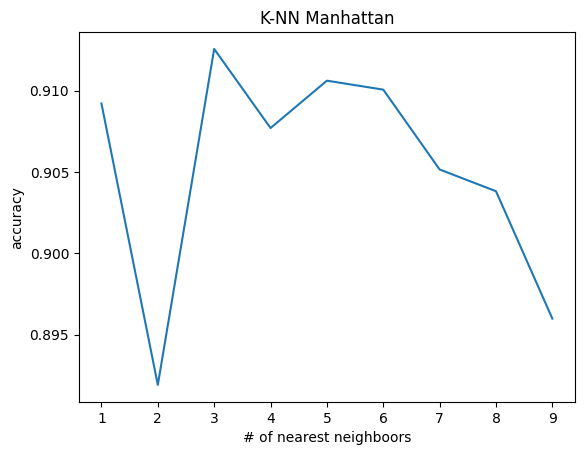

In [10]:
plt.plot(k_num,acc)
plt.title('K-NN Manhattan')
plt.xlabel('# of nearest neighboors')
plt.ylabel('accuracy')
plt.show()

In [11]:
print('best accuracy ：',max(acc))
print('Most accurate number of nearest neighboors ：',acc.index(max(acc))+1)

best accuracy ： 0.9125586025180933
Most accurate number of nearest neighboors ： 3
